# Count of categorical parameter values

In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.core.display import display, HTML



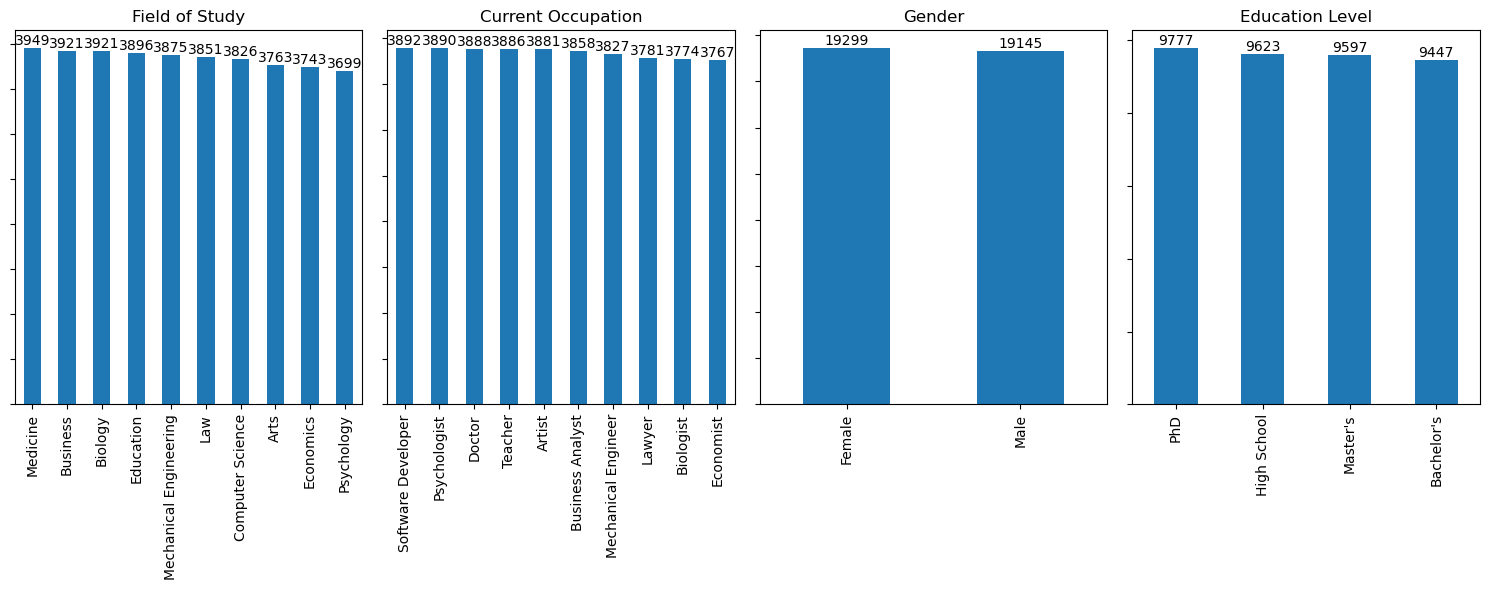

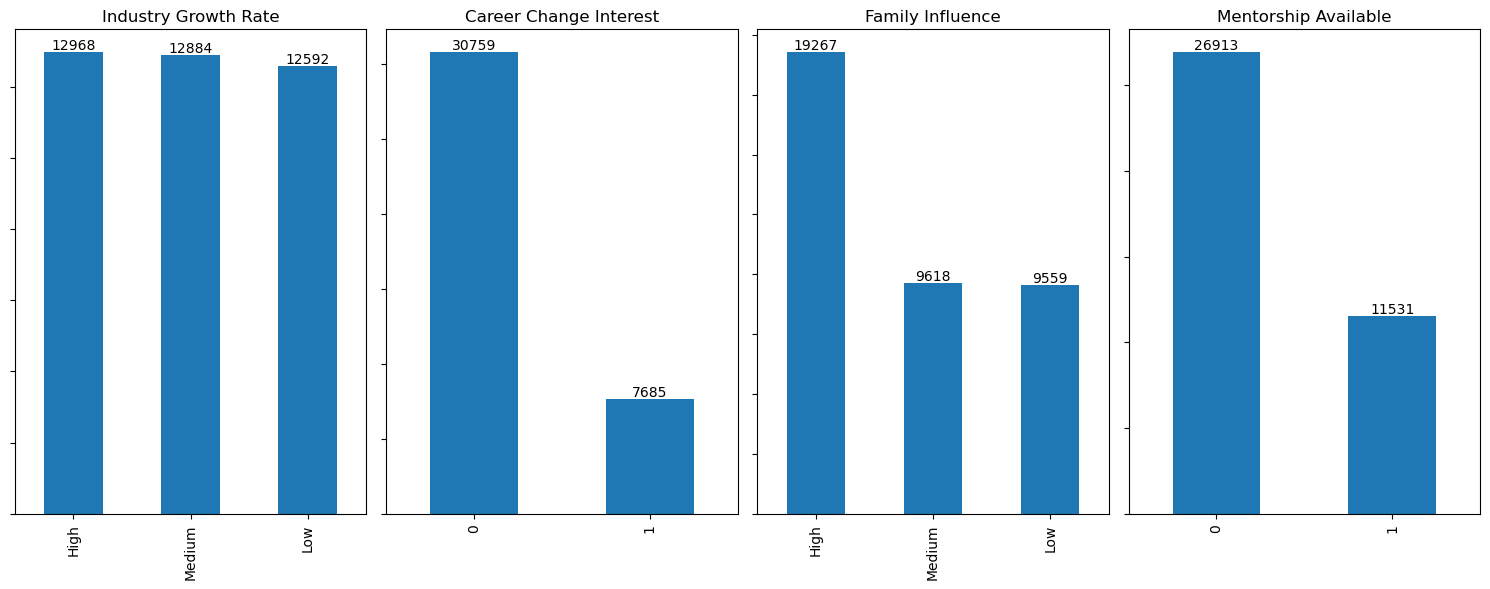

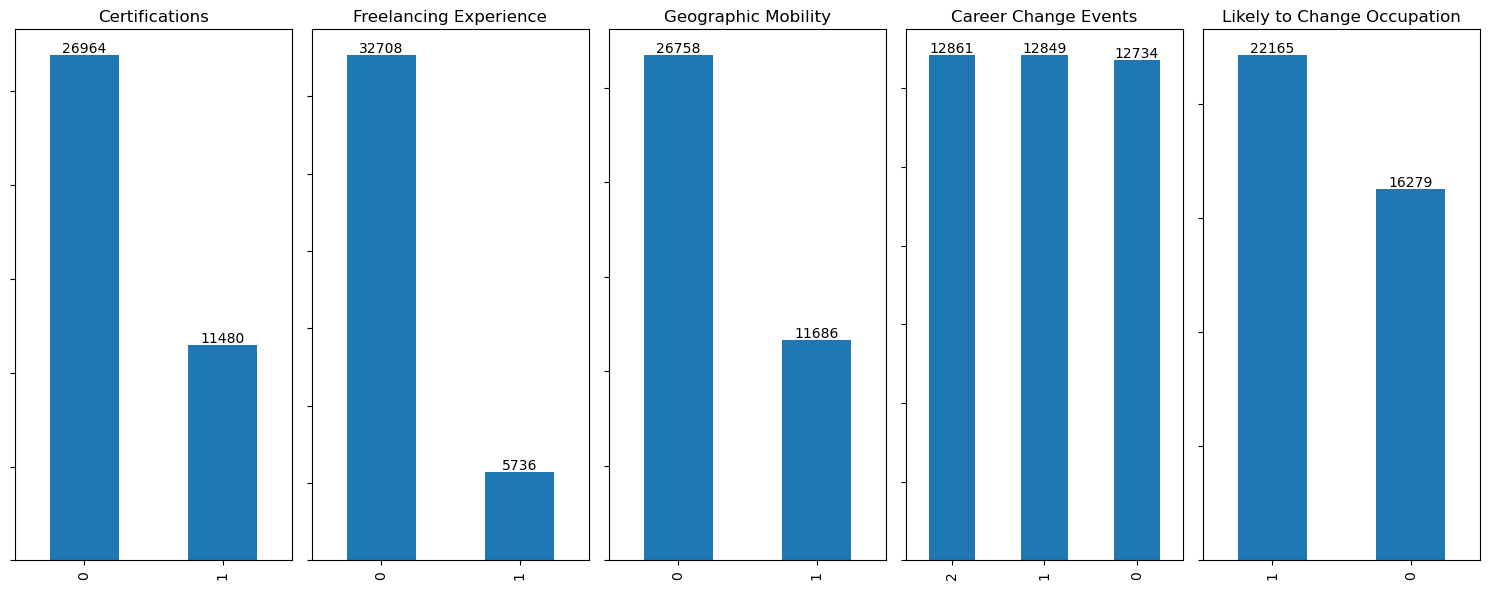

In [3]:
def training():
    # 初始化三个空列表，分别用于存储模型的得分、分类报告和混淆矩阵
    scores, reports, cms = [], dict(), dict()

    # 遍历模型和名称
    for i, j in zip(models, names):
        # 训练模型
        i.fit(x_train, y_train)
        # 预测
        pred = i.predict(x_test)
        # 计算得分并添加到列表中
        scores += [accuracy_score(pred, y_test) * 100]
        # 生成分类报告并添加到字典中
        reports[j] = classification_report(pred, y_test)
        # 生成混淆矩阵并添加到字典中
        cms[j] = confusion_matrix(pred, y_test)

    # 将得分转换为DataFrame
    dd = pd.DataFrame({"score": scores}, index=names)
    # 创建子图
    fig, axes = plt.subplots()
    # 按得分降序排序
    dd = dd.sort_values("score", ascending=False)
    # 四舍五入得分
    dd["score"] = round(dd["score"], 2)
    # 绘制柱状图
    dd["score"].plot(kind="bar", ax=axes)
    # 添加标签
    bar_labels(axes)
    # 调整布局
    plt.tight_layout()
    # 显示图形
    plt.show()

    # 初始化索引
    index = 0

    # 绘制混淆矩阵
    for _ in range(2):
        # 创建子图
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        # 遍历子图
        for i in range(4):
            # 绘制混淆矩阵
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            # 设置标题
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            # 索引加一
            index += 1
        # 调整布局
        plt.tight_layout()
        # 显示图形
        plt.show()

    # 打印分类报告
    for i in dd.index:
        print("*" * 30)
        print(i)
        print(reports[i])
        print("\n\n")


# 读取数据集
df = pd.read_csv("career_change_prediction_dataset.csv")

# 填充缺失值
df["Family Influence"].fillna(df["Family Influence"].mode()[0], inplace=True)

# 获取类别特征
cats = [i for i in df.columns if df[i].nunique() <= 4]
# 添加需要分析的类别特征
cats = ["Field of Study", "Current Occupation"] + cats
# 获取数值特征
nums = [i for i in df.columns if i not in cats]

# 初始化索引
index = 0

# 绘制类别特征的柱状图
for _ in range(3):
    # 设置子图数量
    n = 4
    # 如果是最后一次循环，增加子图数量
    if _ == 2:
        n += 1
    # 创建子图
    fig, axes = plt.subplots(ncols=n, figsize=(15, 6))
    # 遍历子图
    for i in range(n):
        # 绘制柱状图
        df[cats[index]].value_counts().plot(kind="bar", ax=axes[i])
        # 添加标签
        bar_labels(axes[i])
        # 设置标题
        axes[i].set_title(cats[index])
        # 索引加一
        index += 1
    # 调整布局
    plt.tight_layout()
    # 显示图形
    plt.show()

# Influence of different parameters on change of occupation

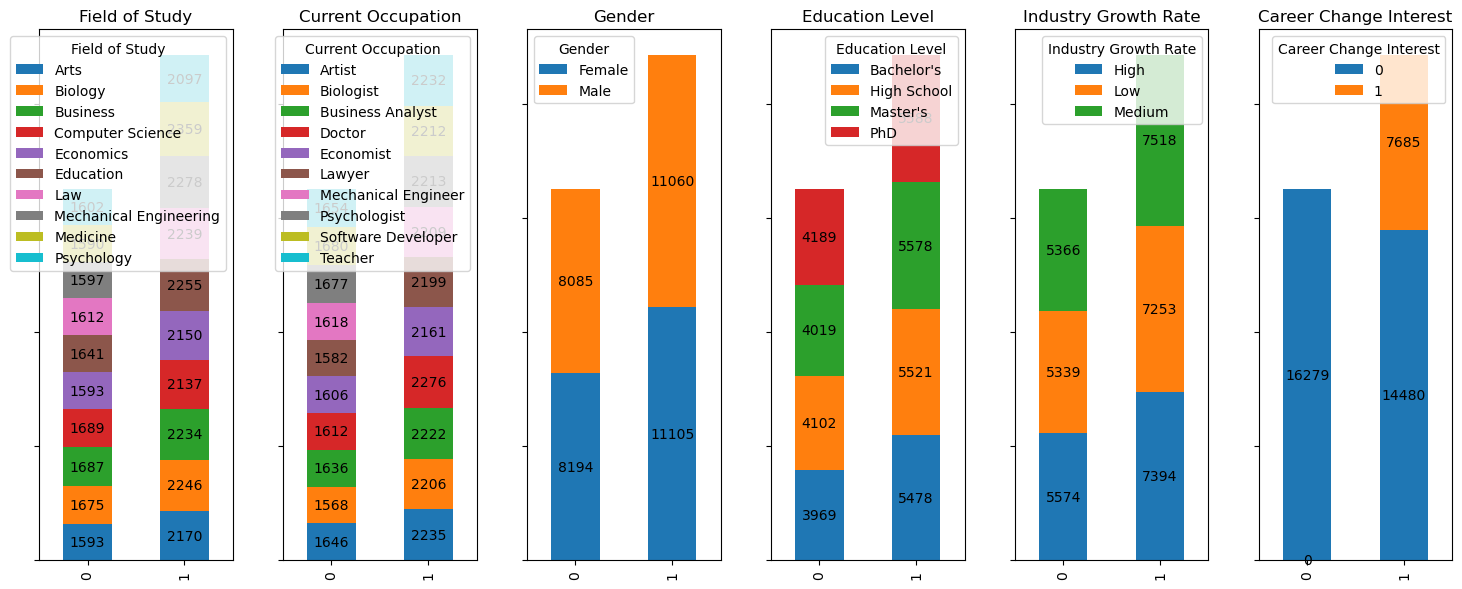

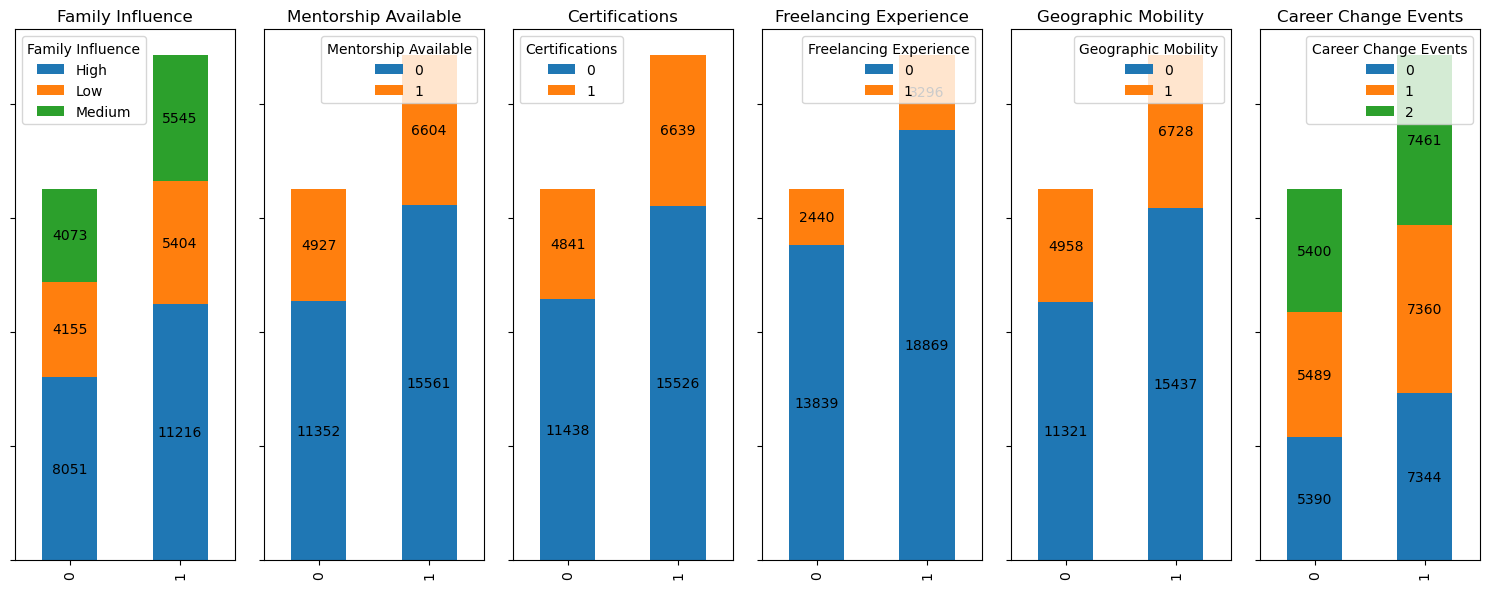

In [4]:
# 对数据框df按照cats中的最后一列进行分组
grouped = df.groupby(cats[-1])

# 创建一个6列的子图，大小为15x6
fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

# 遍历cats中的前6个元素
for i, j in enumerate(cats[:6]):
    # 对分组后的数据按照j列进行计数，并绘制堆叠柱状图
    grouped[j].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
    # 在柱状图上添加标签
    bar_labels(axes[i], 0, "center")
    # 设置子图的标题为j
    axes[i].set_title(j)
# 调整子图布局
plt.tight_layout()
# 显示子图
plt.show()

# 创建一个6列的子图，大小为15x6
fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

# 遍历cats中的第7个到倒数第2个元素
for i, j in enumerate(cats[6:-1]):
    # 对分组后的数据按照j列进行计数，并绘制堆叠柱状图
    grouped[j].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
    # 在柱状图上添加标签
    bar_labels(axes[i], 0, "center")
    # 设置子图的标题为j
    axes[i].set_title(j)
# 调整子图布局
plt.tight_layout()
# 显示子图
plt.show()

# Numerical parameters dynamics distribution

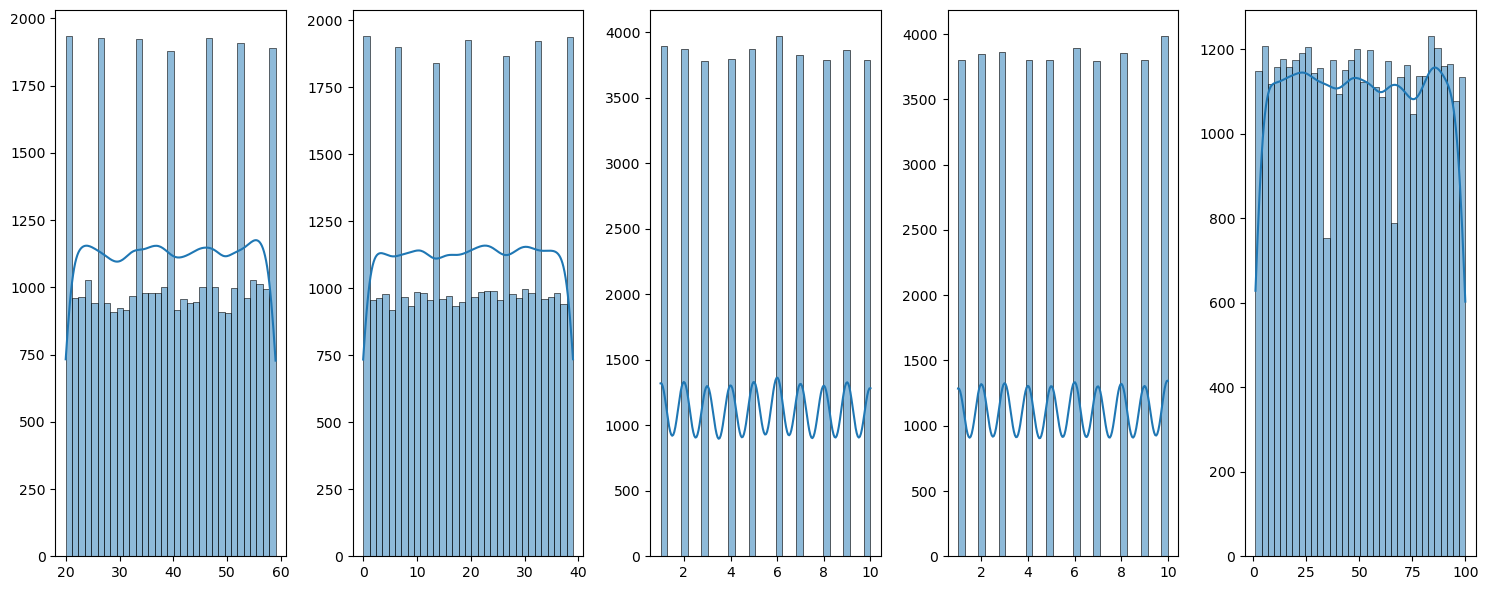

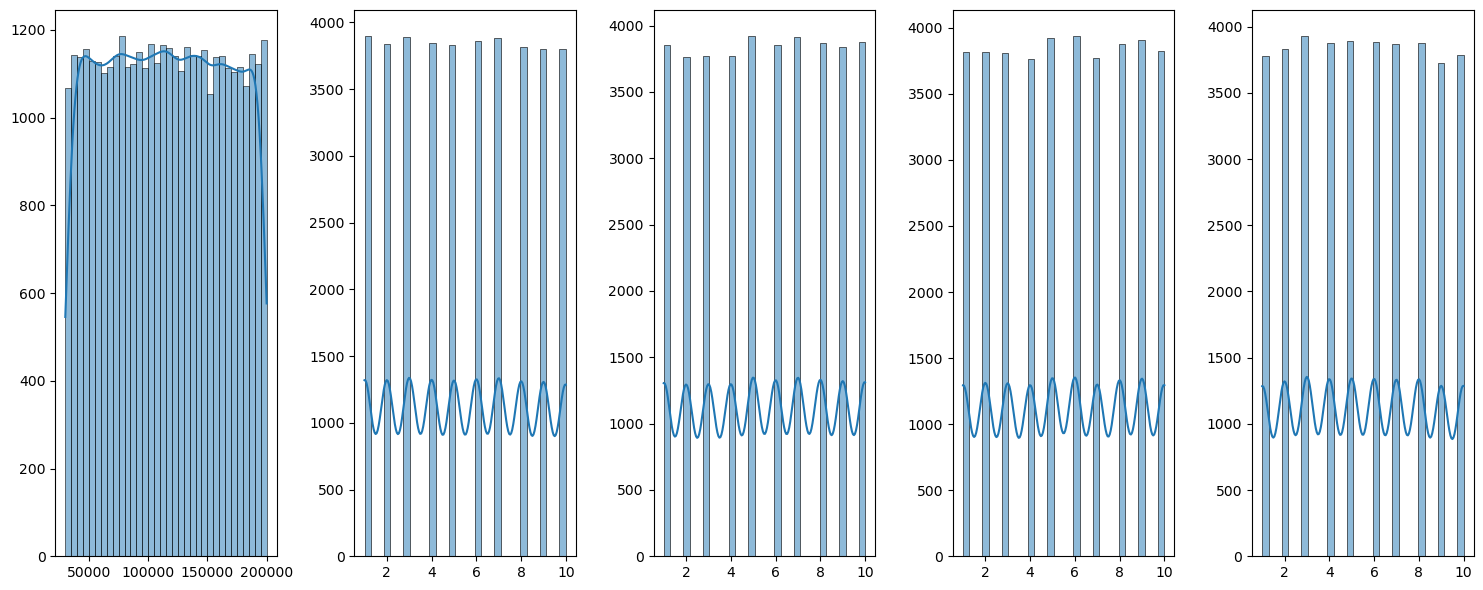

In [5]:
# 创建一个包含5个子图的图形，每个子图的大小为15x6
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

# 遍历nums列表的前5个元素
for i, j in enumerate(nums[:5]):
    # 在第i个子图上绘制df中j列的直方图，并添加核密度估计曲线
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    # 设置y轴标签为空
    axes[i].set_ylabel("")
    # 设置x轴标签为空
    axes[i].set_xlabel("")
    # 设置标题为空
    axes[i].set_title("")
# 调整子图之间的间距
plt.tight_layout()
# 显示图形
plt.show()

# 创建一个包含5个子图的图形，每个子图的大小为15x6
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

# 遍历nums列表的第6个元素到最后一个元素
for i, j in enumerate(nums[5:]):
    # 在第i个子图上绘制df中j列的直方图，并添加核密度估计曲线
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    # 设置y轴标签为空
    axes[i].set_ylabel("")
    # 设置x轴标签为空
    axes[i].set_xlabel("")
    # 设置标题为空
    axes[i].set_title("")
# 调整子图之间的间距
plt.tight_layout()
# 显示图形
plt.show()

# Change of occupation by numerical parameters

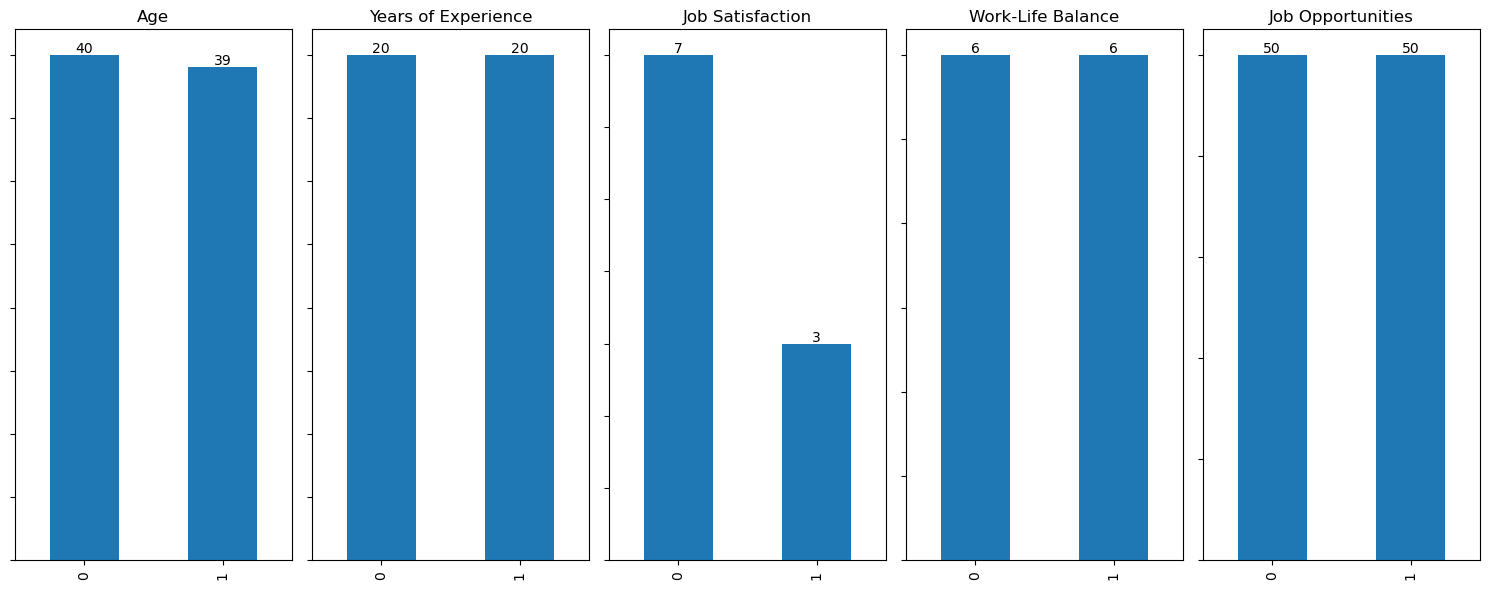

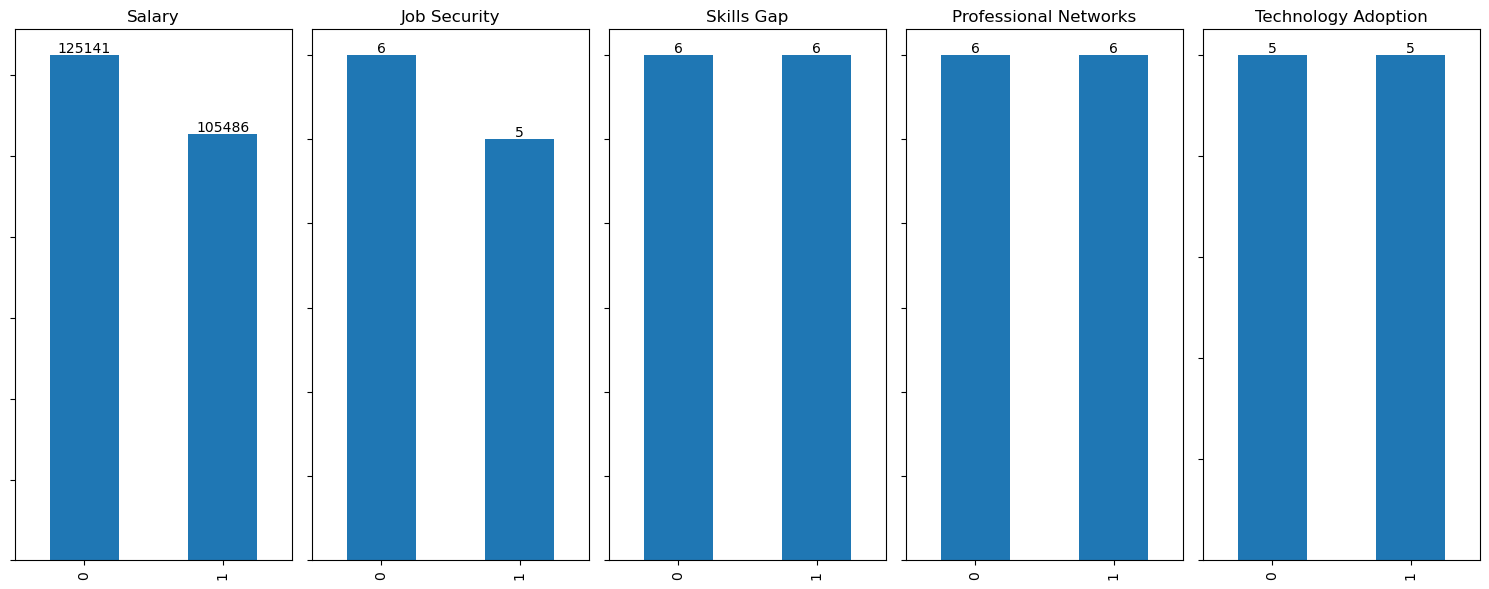

In [6]:
# 定义一个变量index，初始值为0
index = 0

# 循环两次
for _ in range(2):
    # 创建一个包含5个子图的图形对象
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    # 循环5次
    for i in range(5):
        # 获取grouped中nums[index]的median值
        med = grouped[nums[index]].median()
        # 将median值按照升序排序
        med = med.sort_values(ascending=False)
        # 将median值绘制成柱状图
        med.plot(kind="bar", ax=axes[i])
        # 为柱状图添加标签
        bar_labels(axes[i])
        # 设置子图的标题为nums[index]
        axes[i].set_title(nums[index])
        # index加1
        index += 1
    # 调整子图之间的间距
    plt.tight_layout()
    # 显示图形
    plt.show()

# Numerical parameters dynamics for each case of occupancy change

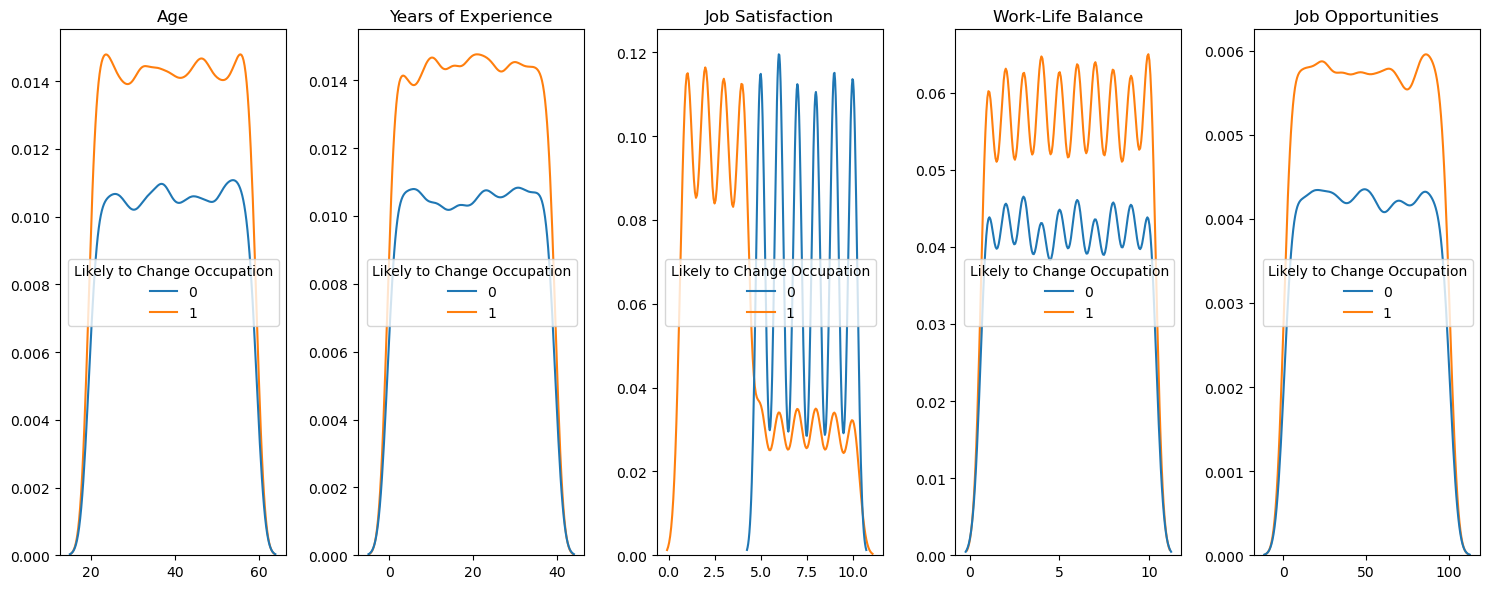

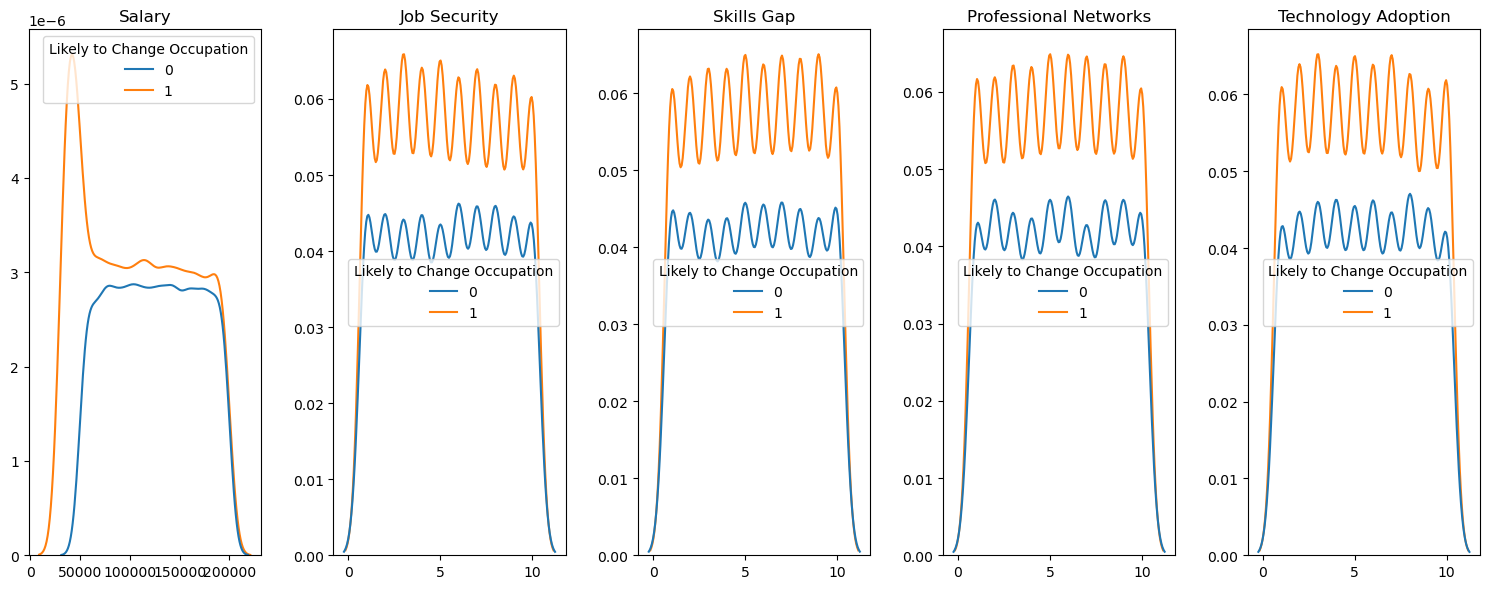

In [7]:
# 定义变量index为0
index = 0

# 循环2次
for _ in range(2):
    # 创建一个5列的子图，大小为15x6
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    # 循环5次
    for i in range(5):
        # 在第i个子图中绘制KDE图，x轴为nums[index]，y轴为cats[-1]
        sns.kdeplot(df, x=nums[index], hue=cats[-1], ax=axes[i])
        # 设置x轴标签为空
        axes[i].set_xlabel("")
        # 设置y轴标签为空
        axes[i].set_ylabel("")
        # 设置子图标题为nums[index]
        axes[i].set_title(nums[index])
        # index加1
        index += 1
    # 调整子图布局
    plt.tight_layout()
    # 显示子图
    plt.show()

# Classification models performances evaluated

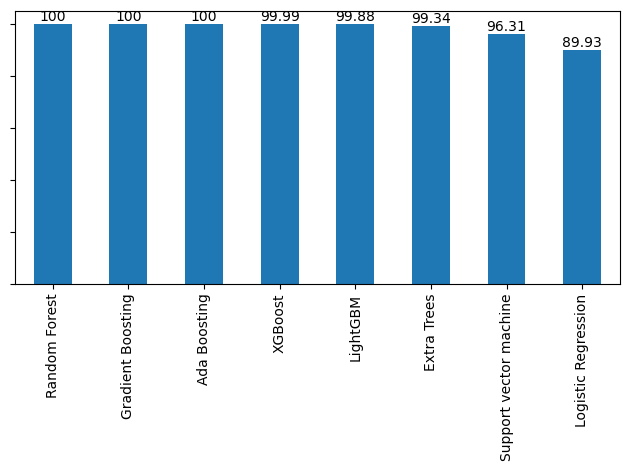

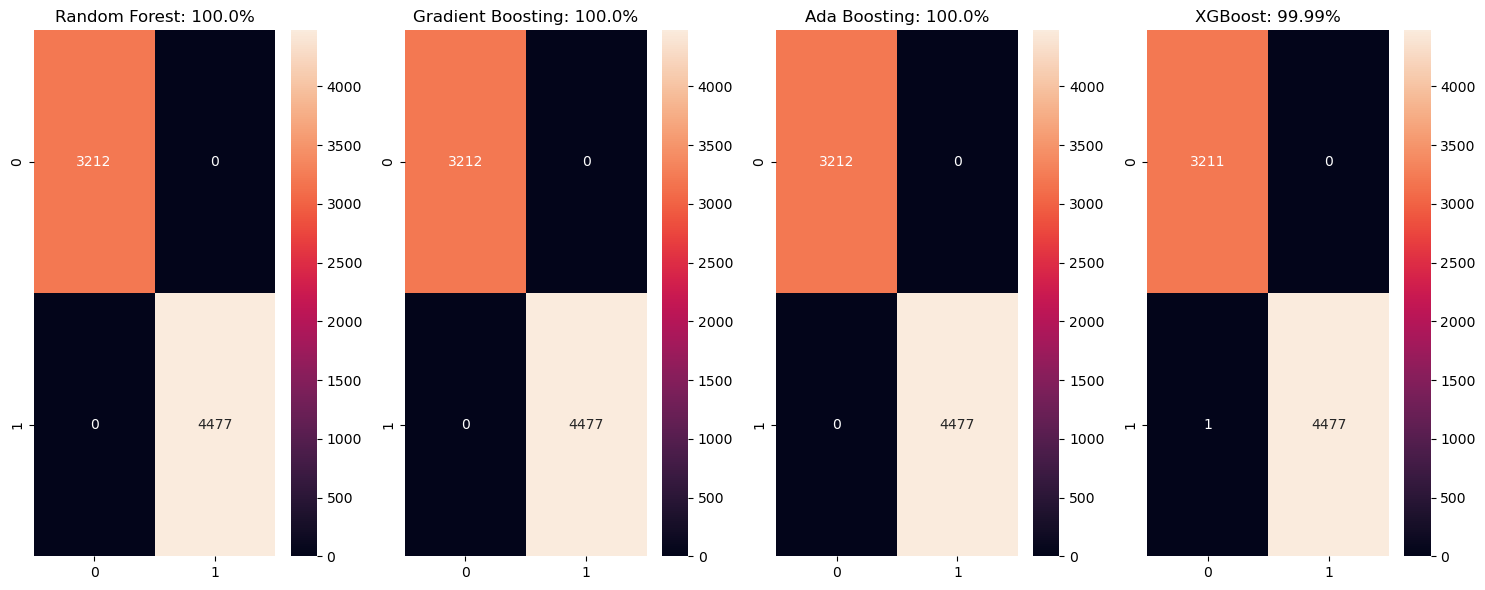

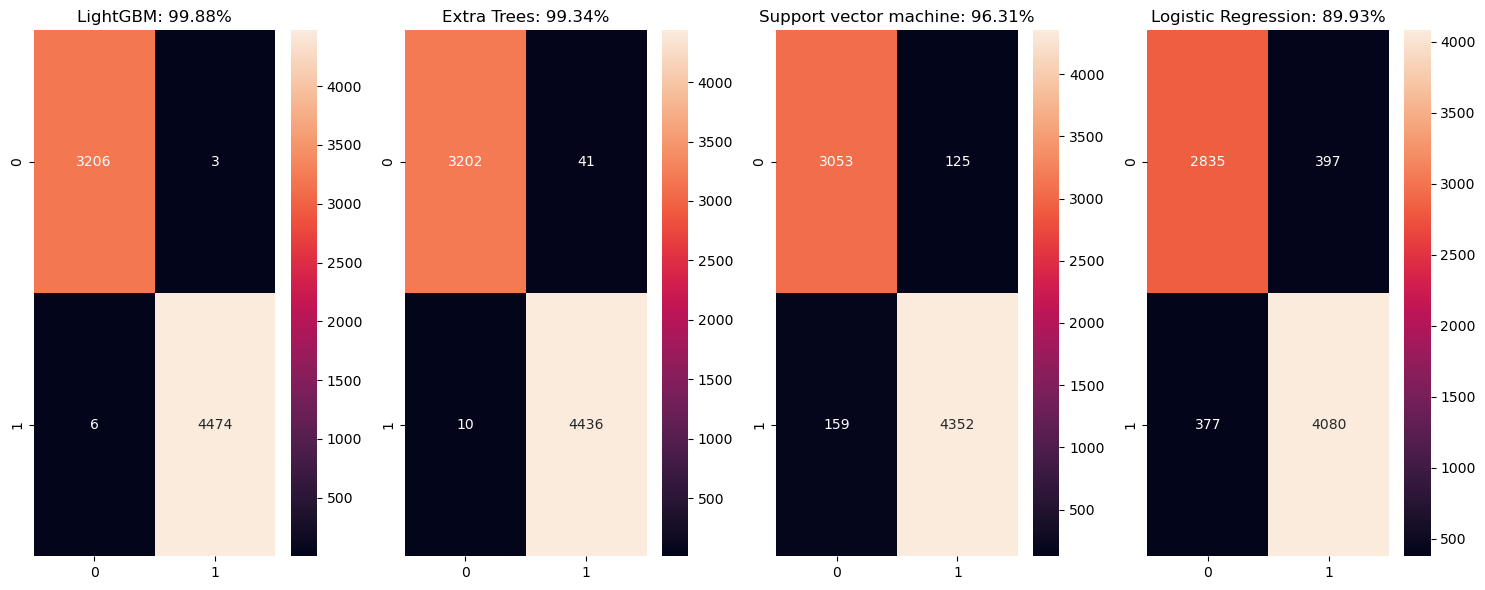

******************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689




******************************
Ada Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                          

In [8]:
for i in cats[:-1]:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].values)

scaler = MinMaxScaler()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training()